In [3]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
import seaborn as sns
from glob import glob
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve, auc

In [4]:
# Get list of all CSV files 
files = glob("data/CIC-IDS-2017/MachineLearningCVE/*.csv")

## Step 1: Data exploration

In [5]:
def read_data(fname):
    df = pd.read_csv(fname)
    df.rename(columns={col: col.strip() for col in df.columns}, inplace=True)
    return df 
    
def pre_process(df):
    df = df[df.columns.tolist()[:-1]]
    df = df.fillna(0)
    df.replace([np.inf, -np.inf], -1, inplace=True)
    return df

In [6]:
fname = "data/CIC-IDS-2017/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv"
df = read_data(fname)

<Axes: xlabel='Fwd Packet Length Mean', ylabel='Proportion'>

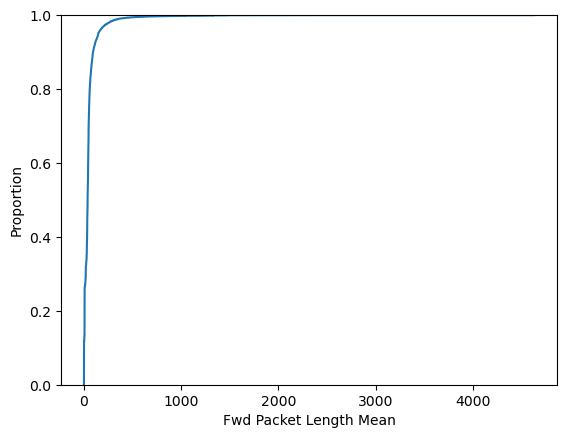

In [7]:
sns.ecdfplot(data=df, x="Fwd Packet Length Mean")

**Exercise**: Read data from Thursday and plot the distribution for a given feature for both benign and attack traffic. 

In [25]:
features = ['Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s']

In [39]:
fname = "data/CIC-IDS-2017/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv"
df = read_data(fname)

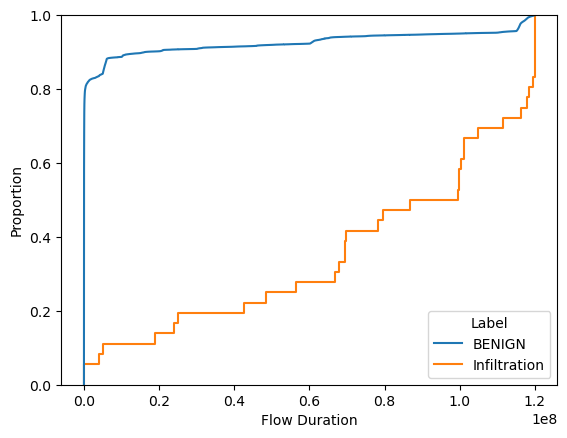

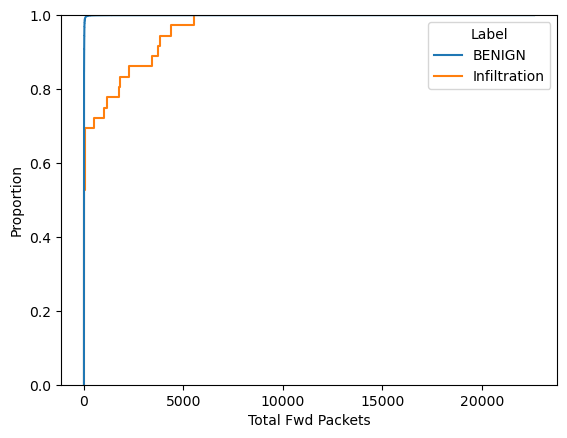

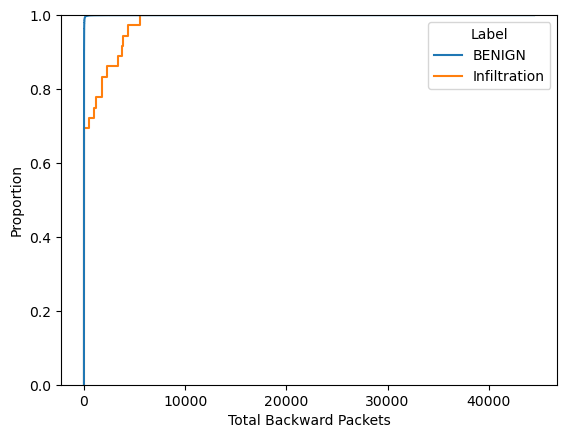

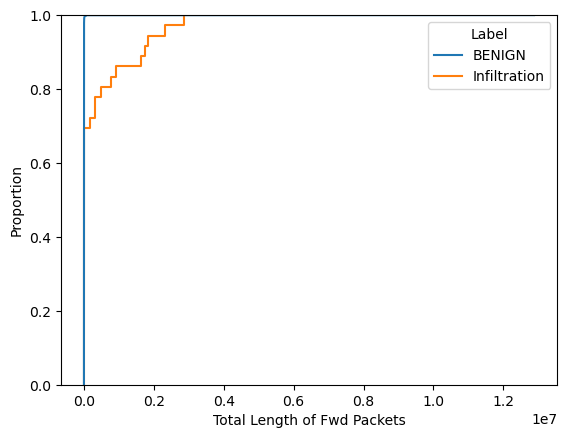

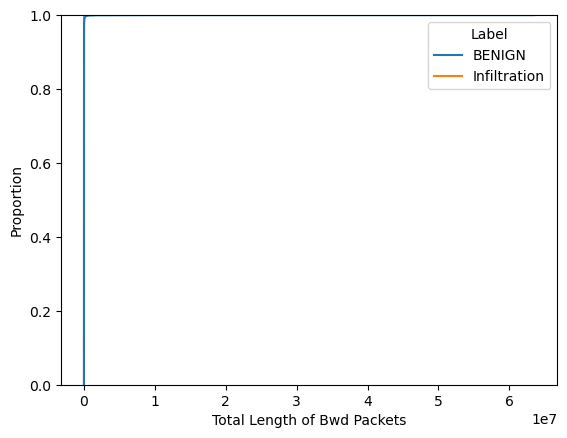

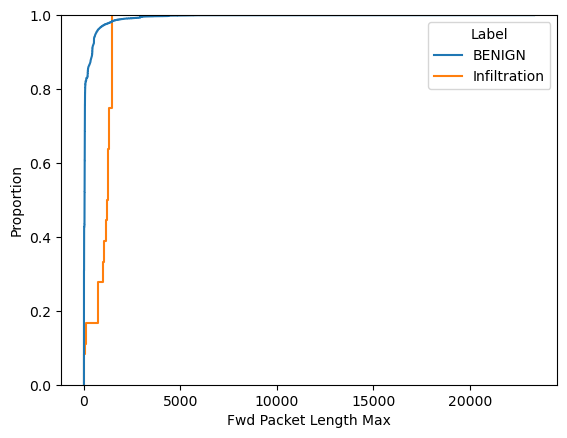

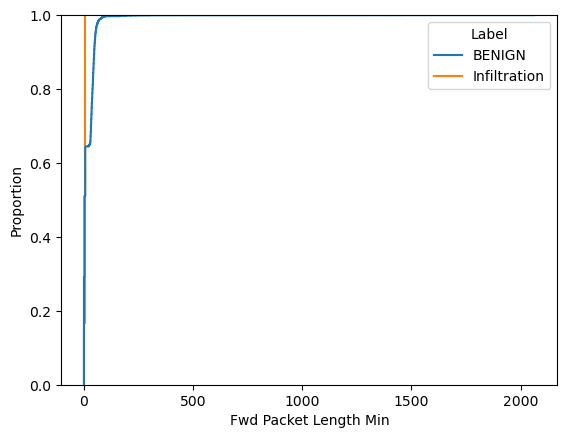

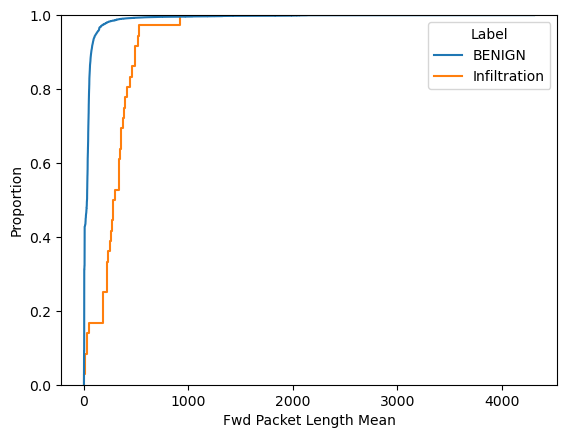

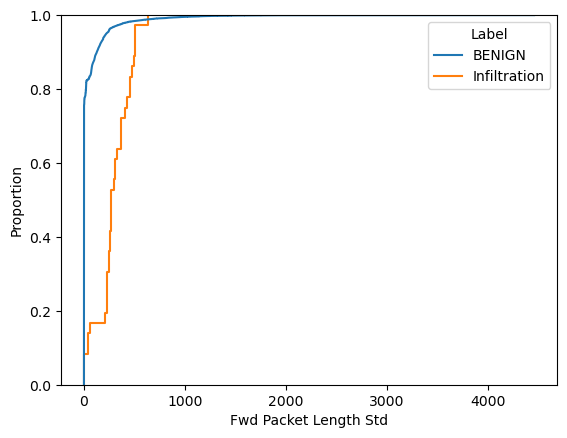

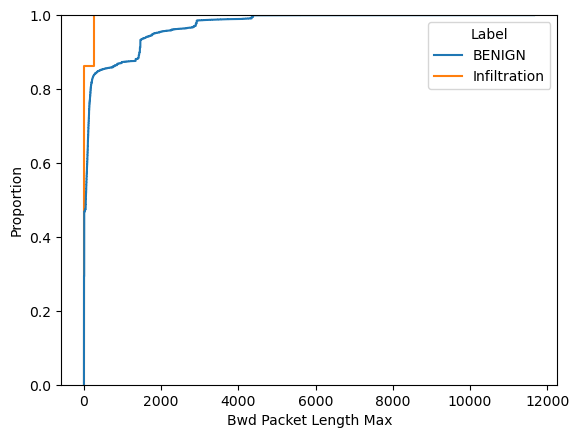

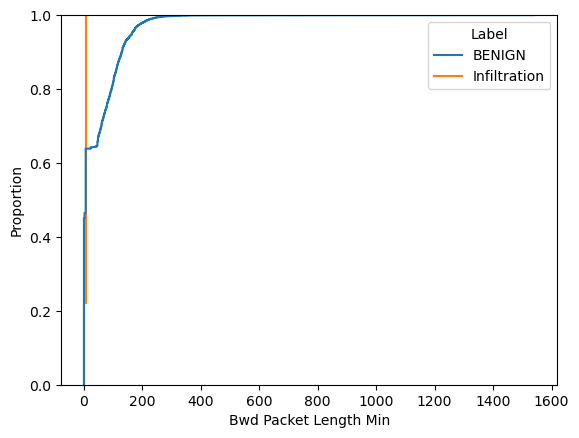

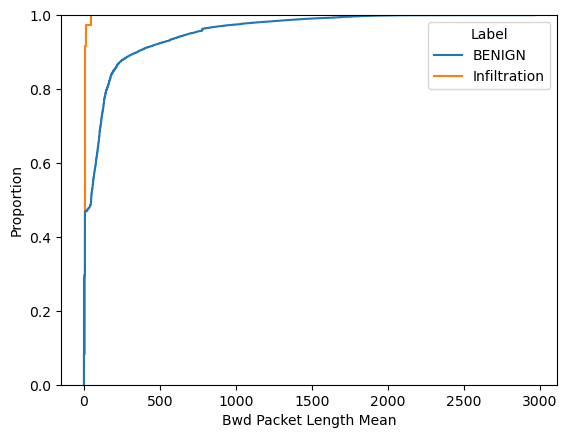

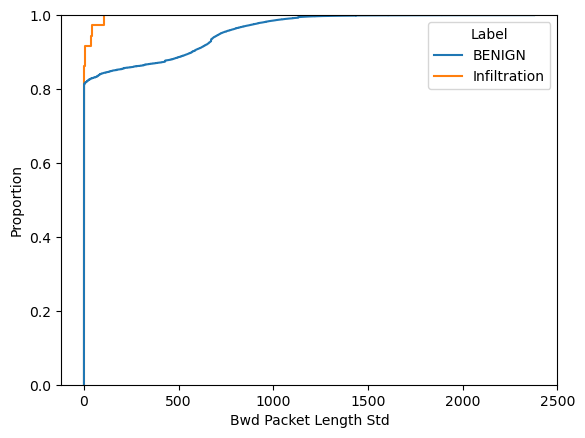

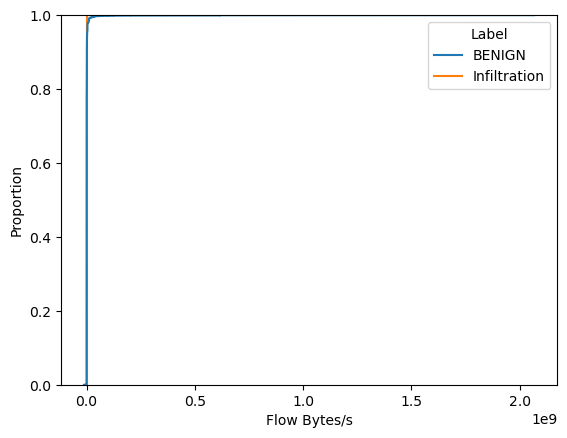

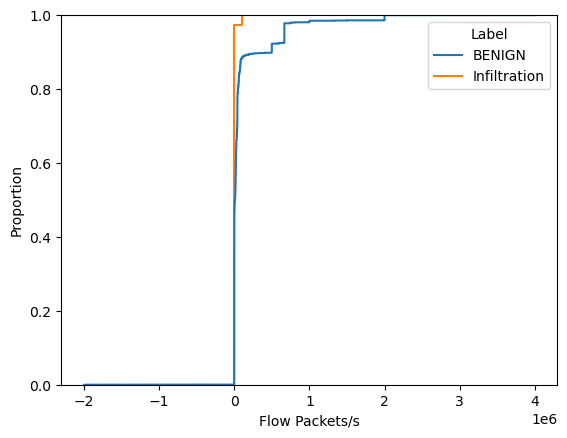

In [40]:
for feature in features:
    plt.figure()
    sns.ecdfplot(data=df, x=feature, hue="Label")

## Step 2: Anomaly Detection 

Read the Monday data and use it as the training data to train an Isolation Forest. Now test it over the data from Wednesday. Report the precision and recall for a given threshold. 

In [34]:
train_file = "data/CIC-IDS-2017/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv"
df_train = read_data(train_file)
X_train = pre_process(df_train)

test_file = "data/CIC-IDS-2017/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv"
df_test = read_data(test_file)
X_test = pre_process(df_test)

In [41]:
# Train the Isolation Forest model
clf = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
clf.fit(X_train)

IsolationForest(random_state=42)

In [48]:
df_test["anomaly_score"] = clf.decision_function(X_test)
df_test["label"] = df_test["Label"].apply(lambda x: 1 if x == "BENIGN" else -1)

<Axes: xlabel='anomaly_score', ylabel='Proportion'>

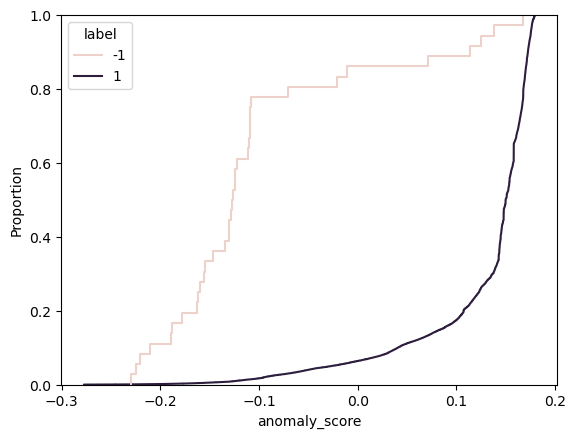

In [51]:
sns.ecdfplot(data = df_test, x="anomaly_score", hue="label")

In [49]:
#Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(df_test["label"], -df_test["anomaly_score"])  # Negate anomaly scores for precision-recall calculation

#Compute area under the curve (AUC)
auc_score = auc(recall, precision)
print(auc_score)

0.9994358940855025


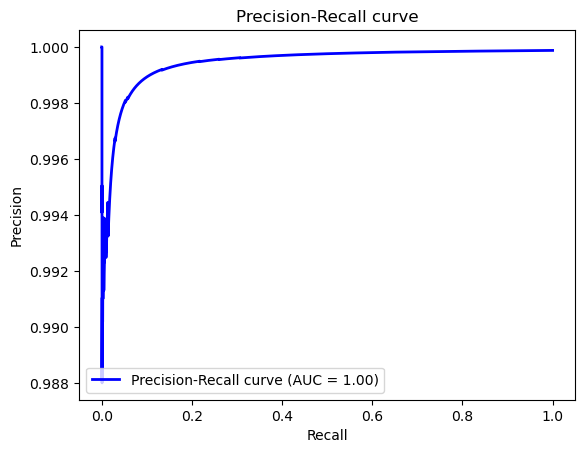

In [50]:
# 5. Plot the precision-recall curve
import matplotlib.pyplot as plt

plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AUC = %0.2f)' % auc_score)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc='lower left')
plt.show()

## Step 3 
- How will you do this based on 